## Simple Linear Regression with NumPy

### Plotting Linear Functions

In school students are taught to draw lines like this, y = 2x+1

They do this by picking two values for x, and finding the corresponding values for y. (Actually they do this by finding the x-intercept, where y = 0, and the y-intercept, where x = 0.) Plot the two points, draw a straight line between them and extend this line to get the graph of y 

In [1]:
import matplotlib.pyplot as plt

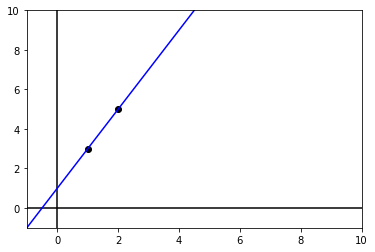

In [2]:
#Draw some axes
plt.plot([-1, 10], [0, 0], 'k-')
plt.plot([0, 0], [-1, 10], 'k-')

#Plotting point one
s=1
t=2*(s)+1
plt.plot(s, t, 'ko')

#plotting point two
p=2
q=2*(p)+1
plt.plot(p, q, 'ko')

#plotting the line 
plt.plot([-1,10], [-1,21], '-b')

#Setting x and y limits
plt.xlim(-1, 10)
plt.ylim(-1, 10)

plt.show()

## Line of Best Fit

### Simulated Data 
Contrived problem - Objects of increasing weight are attached to a spring, and the distance the spring hangs down increases as the weight increases.

In [3]:
%matplotlib inline

In [4]:
import numpy as np

In [5]:
# Creating fake data 
#Weight = w
w = np.arange(0, 21, 1)
#Distance = d
d = 5*w + 10 + np.random.normal(0, 5, w.size)
#equation of line of best fit, plus random numbers between 0 and 5. 
#There will be 21 random numbers as size is equal to the length of w.
print('Weights: ', w)
print()
print('Distances: ', d)

Weights:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]

Distances:  [ 10.08546593  21.25444488  27.75537201  30.18602008  31.76634231
  29.61378748  40.55650434  50.56408246  49.14937512  49.22084496
  71.4029771   67.24711238  69.43003406  74.35270251  83.34036032
  86.97768595  92.74036405  97.27161027  96.06035346 107.99174722
 101.72121205]


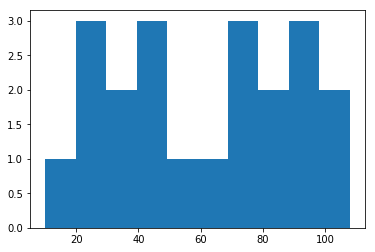

In [6]:
#Let's see what this looks like
plt.hist(d)
plt.show()


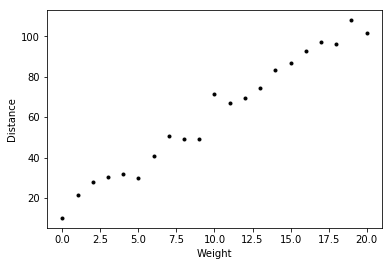

In [7]:
plt.plot(w, d, 'k.')
plt.xlabel('Weight')
plt.ylabel('Distance')
plt.show()

In [8]:
#Calculating the Correlation Coefficient
np.corrcoef(w, d)[0, 1]
#but now how do I get the Y-Intercept

0.988809273931945

### Linear Models

At this point, Ian used a trial and error method to overlay the scatter plot with various lines of best fit that could model the data. This isn't how you would start to create a model but I have included this code, to improve my own use of labels in my plots

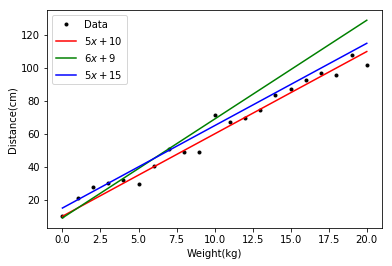

In [9]:
#Plot data points
plt.plot(w, d, 'k.', label = 'Data')
# x = range(21)
x=np.arange(0, 21, 1)
# plotting 3 random lines of best fit
# NOTE: we used the red line + noise  to simulate this data
plt.plot(x, 5*x+10, 'r-', label='$5x+10$')
plt.plot(x, 6*x+9, 'g-', label='$6x+9$')
plt.plot(x, 5*x+15, 'b-', label='$5x+15$')
#labeling axes
plt.xlabel('Weight(kg)')
plt.ylabel('Distance(cm)')
plt.legend()
plt.show()

**Which line of best fit is the best?**

Luckily almost everyone agrees that it's the line that minimizes the sum of the errors squared. 

Also known as The Least Squares Line. 
![](https://image.slidesharecdn.com/chapter2-part3-140319064454-phpapp01/95/chapter-2-part3leastsquares-regression-6-638.jpg?cb=1395211851)

In [10]:
# Now let's apply this method to the three lines of best fit, I have above
#Calculate the cost for the lines with the data
cost = lambda m, c:np.sum([(d[i]-m*w[i]-c)**2 for i in range(w.size)])

In [11]:
print('Cost with m = %5.2f, and c =%5.2f: %8.2f' %(5, 10, cost(5, 10)))
print('Cost with m = %5.2f, and c =%5.2f: %8.2f' %(6, 9, cost(6,9)))
print('Cost with m = %5.2f, and c =%5.2f: %8.2f' %(5, 15, cost(5, 15)))

Cost with m =  5.00, and c =10.00:   480.26
Cost with m =  6.00, and c = 9.00:  2801.30
Cost with m =  5.00, and c =15.00:   718.37


### Minimizing the Cost

You need to used differentiation to find the least squares line. 

In [12]:
#Find the means
w_avg=np.mean(w)
d_avg=np.mean(d)

# Subtract the means from the actual data points
w_zero= w - w_avg
d_zero=d-d_avg

#The best m
m=np.sum(w_zero*d_zero)/np.sum(w_zero*w_zero)

#The best c
c=d_avg-m*w_avg

print('m is %3.6f and c is %6.6f' %(m,c))

m is 4.762058 and c is 13.745534


**Shortcut:** Don't use np.corrcoef. Instead use np.polyfit

In [13]:
print(np.polyfit(w, d, 1))

[ 4.762058   13.74553427]


### Best fit line

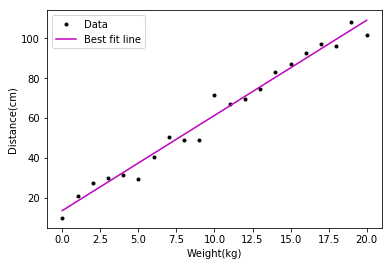

In [14]:
#Plot data points
plt.plot(w, d, 'k.', label = 'Data')
# x = range(21)
x=np.arange(0, 21, 1)
# plotting 3 random lines of best fit
# NOTE: we used the red line + noise  to simulate this data
plt.plot(w, m*w+c, 'm-', label='Best fit line')
#labeling axes
plt.xlabel('Weight(kg)')
plt.ylabel('Distance(cm)')
plt.legend()
plt.show()

In [15]:
print('m=%.3f, c=%.3f and cost=%.3f.' % (m, c, cost(m,c)))

m=4.762, c=13.746 and cost=397.472.


There is no line that fits this data with cost of zero, as the points are not collinear

## See Advanced topics in Ian McLoughlin's Notebook